## AULA 03 - PYTHON

Nesta aula veremos:
1. Numpy arrays e pandas Dataframes
2. Open and export file
3. Conditional Statements
4. Loops em Python
5. Functions - def

## 1.1 Numpy arrays

In [1]:
import numpy as np

# Criando um vetor de dados aleatórios
data = np.random.rand(1000,2)

# Verificando o tamanho do vetor
print(data.shape)
print(np.size(data))

# Print de uma amostra dos dados
print(data[0:10])
print(data[0:10].shape)

(1000, 2)
2000
[[0.46226202 0.78878954]
 [0.12585347 0.24590594]
 [0.36115213 0.06608023]
 [0.11664383 0.62701243]
 [0.65569021 0.73619614]
 [0.0486805  0.87789844]
 [0.31049758 0.26677908]
 [0.84682762 0.82786362]
 [0.8442413  0.1798634 ]
 [0.3812792  0.46941574]]
(10, 2)


In [2]:
# Usando Monte-Carlo
dataMax = 1000
dataMin = 10
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[467.63939609 790.90164065]
 [134.59493801 253.44688038]
 [367.54061203  75.41942553]
 [125.47739234 630.74231041]
 [659.13330787 738.83417465]
 [ 58.19369215 879.11945426]
 [317.39260259 274.11129231]
 [848.35934512 829.58498006]
 [845.79888585 188.06476322]
 [387.46640963 474.72158432]]


<class 'numpy.ndarray'>


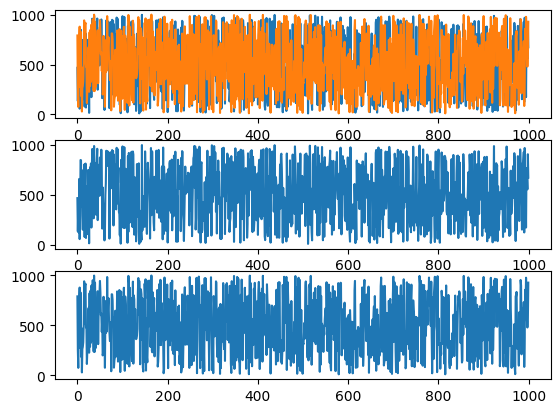

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3)
ax[0].plot(data)
ax[1].plot(data[:,0])
ax[2].plot(data[:,1])
print(type(data))

In [4]:
# Criando um dado 2D 
data3d = np.sin(np.random.rand(1000,1000))
print(data3d)

[[0.12210079 0.60972259 0.79333828 ... 0.20296244 0.31295019 0.78824479]
 [0.06288494 0.8010038  0.62822377 ... 0.55033664 0.02569875 0.75076053]
 [0.27169253 0.69239471 0.58218253 ... 0.40428303 0.08632799 0.65898306]
 ...
 [0.6955902  0.69994369 0.53704399 ... 0.24858202 0.80024768 0.2998857 ]
 [0.00142475 0.40076062 0.80789394 ... 0.83665751 0.40938087 0.51792975]
 [0.58281498 0.25642543 0.74071547 ... 0.52843431 0.27604084 0.09428127]]


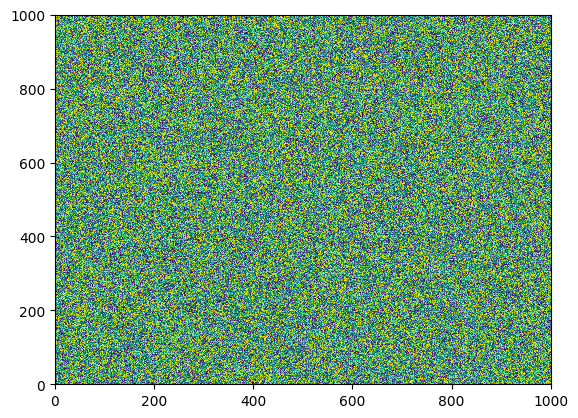

In [5]:
# Plotando um dado 3D
fig2, ax2 = plt.subplots()
ax2.pcolor(data3d)

In [6]:
# Criando vertor temporal
dtime = np.arange(np.datetime64("2022-01-01"), np.datetime64("2023-01-01"), np.timedelta64(1, "h"))
print(dtime[1:10])
print(dtime.shape)
print(type(dtime))

['2022-01-01T01' '2022-01-01T02' '2022-01-01T03' '2022-01-01T04'
 '2022-01-01T05' '2022-01-01T06' '2022-01-01T07' '2022-01-01T08'
 '2022-01-01T09']
(8760,)
<class 'numpy.ndarray'>


## PANDAS

In [7]:
import pandas as pd

# Criando um dataframe
df = pd.DataFrame()

In [10]:
# Monstrando um dataframe
df['datetime'] = dtime

In [11]:
# Criando uma coluna random dentro do dataframe df
df['random'] = np.random.rand(df.shape[0])

In [12]:
df['random'][1:10]


1    0.802840
2    0.736532
3    0.554148
4    0.698067
5    0.520721
6    0.408490
7    0.644439
8    0.736335
9    0.939488
Name: random, dtype: float64

In [13]:
# Indexação
df.iloc[:,0]

0      2022-01-01 00:00:00
1      2022-01-01 01:00:00
2      2022-01-01 02:00:00
3      2022-01-01 03:00:00
4      2022-01-01 04:00:00
               ...        
8755   2022-12-31 19:00:00
8756   2022-12-31 20:00:00
8757   2022-12-31 21:00:00
8758   2022-12-31 22:00:00
8759   2022-12-31 23:00:00
Name: datetime, Length: 8760, dtype: datetime64[s]

In [14]:
# Colocando o datetime como index
df = df.set_index(df['datetime'])
df

,datetime,random
datetime,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.392559
2022-01-01 01:00:00,2022-01-01 01:00:00,0.802840
2022-01-01 02:00:00,2022-01-01 02:00:00,0.736532
2022-01-01 03:00:00,2022-01-01 03:00:00,0.554148
2022-01-01 04:00:00,2022-01-01 04:00:00,0.698067
...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.895033
2022-12-31 20:00:00,2022-12-31 20:00:00,0.357567
2022-12-31 21:00:00,2022-12-31 21:00:00,0.722806


In [15]:
# Criando colunas com ano, mês e dia
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day

(8760,)


<Axes: xlabel='datetime'>

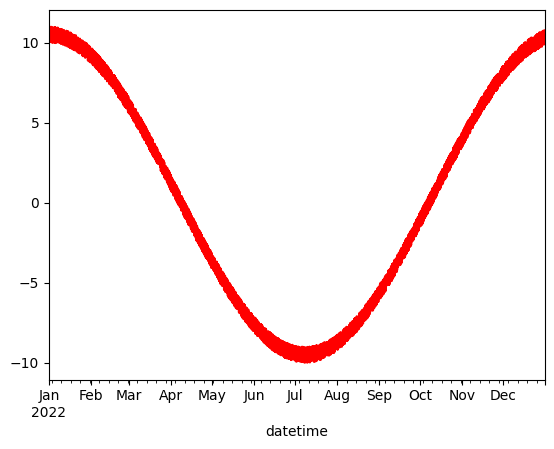

In [16]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonal'] = (np.cos(tt/(360*4)))
df['timeSeries'] = 10*df['sazonal']+df['random']
#df['sazonal'].plot()
df['timeSeries'].plot(color='red')

In [17]:
df

,datetime,random,year,month,day,sazonal,timeSeries
datetime,,,,,,,
2022-01-01 00:00:00,2022-01-01 00:00:00,0.392559,2022,1,1,1.000000,10.392559
2022-01-01 01:00:00,2022-01-01 01:00:00,0.802840,2022,1,1,1.000000,10.802838
2022-01-01 02:00:00,2022-01-01 02:00:00,0.736532,2022,1,1,0.999999,10.736522
2022-01-01 03:00:00,2022-01-01 03:00:00,0.554148,2022,1,1,0.999998,10.554126
2022-01-01 04:00:00,2022-01-01 04:00:00,0.698067,2022,1,1,0.999996,10.698028
...,...,...,...,...,...,...,...
2022-12-31 19:00:00,2022-12-31 19:00:00,0.895033,2022,12,31,0.979401,10.689041
2022-12-31 20:00:00,2022-12-31 20:00:00,0.357567,2022,12,31,0.979541,10.152974
2022-12-31 21:00:00,2022-12-31 21:00:00,0.722806,2022,12,31,0.979680,10.519608


In [18]:
# Salvar meu dataframe

df.to_csv(r'C:\Users\barbara.folador\Documents\GitHub\ENS410064\dados\brutos\noise_2022.csv')

In [19]:
# Criando uma função
def noiseCreation(path, year):
    """Esta função cria um ruido com sazonalidade.
    Inputs:
        path = asdasdas
        year = asdasdasdas

    Criado por Leonardo
    """
    
    # Criando um dataframe
    df = pd.DataFrame()
    
    # Criando vertor temporal
    dtime = np.arange(np.datetime64(str(year)+"-01-01"), np.datetime64(str(year+1)+"-01-01"), np.timedelta64(1, "h"))
    
    # Monstrando um dataframe
    df['datetime'] = dtime
        
    # Datetime como index do dataframe
    df = df.set_index(df['datetime'])
    
    # Criando colunas com ano, mês e dia
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    
    # Crio uma coluna random
    df['random'] = np.random.rand(df.shape[0])
    
    # Adicionar sazonalidade
    tt = np.arange(0,df.shape[0],1)
    print(tt.shape)
    df['sazonal'] = (np.cos(tt/(360*4)))
    df['timeSeries'] = 10*df['sazonal']+df['random']
    #df['sazonal'].plot()
    df['timeSeries'].plot(color='red')
    df.to_csv(path+'/noise_'+str(year)+'.csv')
    
    return df

(8760,)


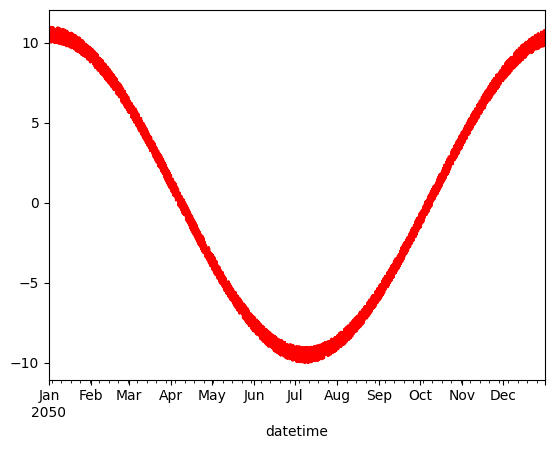

In [20]:
path = 'C:/Users/barbara.folador/Documents/GitHub/ENS410064/dados/brutos'
df2 = noiseCreation(path,2050)

2002
(8760,)
2003
(8760,)
2004
(8784,)
2005
(8760,)
2006
(8760,)
2007
(8760,)
2008
(8784,)
2009
(8760,)


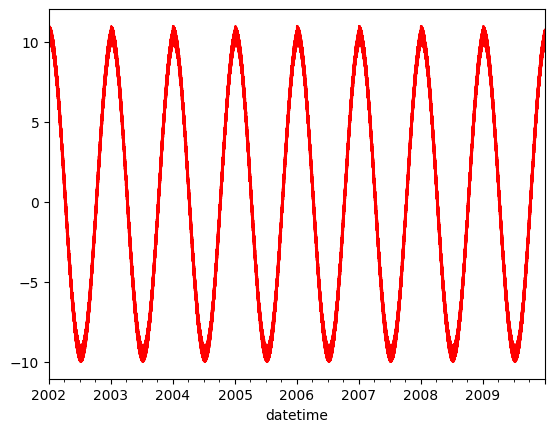

In [21]:
# Primeira opção de loop
for ii in range(2002,2010):
    print(ii)
    df = noiseCreation(path,ii)

In [22]:
df

,datetime,year,month,day,random,sazonal,timeSeries
datetime,,,,,,,
2009-01-01 00:00:00,2009-01-01 00:00:00,2009,1,1,0.802939,1.000000,10.802939
2009-01-01 01:00:00,2009-01-01 01:00:00,2009,1,1,0.525423,1.000000,10.525420
2009-01-01 02:00:00,2009-01-01 02:00:00,2009,1,1,0.008044,0.999999,10.008035
2009-01-01 03:00:00,2009-01-01 03:00:00,2009,1,1,0.870881,0.999998,10.870859
2009-01-01 04:00:00,2009-01-01 04:00:00,2009,1,1,0.704147,0.999996,10.704108
...,...,...,...,...,...,...,...
2009-12-31 19:00:00,2009-12-31 19:00:00,2009,12,31,0.920347,0.979401,10.714354
2009-12-31 20:00:00,2009-12-31 20:00:00,2009,12,31,0.145942,0.979541,9.941350
2009-12-31 21:00:00,2009-12-31 21:00:00,2009,12,31,0.917684,0.979680,10.714486


2001
2030
2032
(8784,)
2053
(8760,)
2060
(8784,)


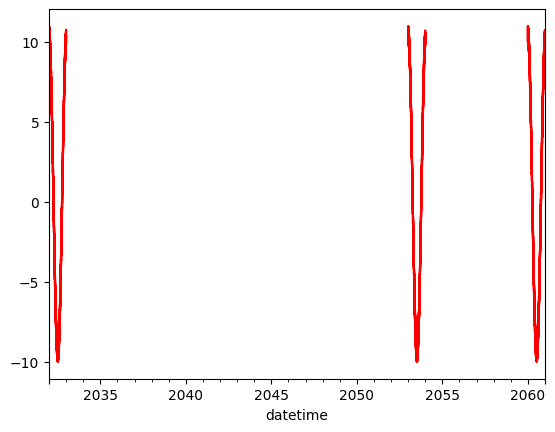

In [23]:
anos = [2001,2030,2032,2053,2060]

for ano in anos:
    print(ano)
    if ano > 2030:
        df = noiseCreation(path,ano)

In [24]:
import os
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(file)
        data = pd.read_csv(path+'/'+file)
        allData.append(data)

['noise_2002.csv', 'noise_2003.csv', 'noise_2004.csv', 'noise_2005.csv', 'noise_2006.csv', 'noise_2007.csv', 'noise_2008.csv', 'noise_2009.csv', 'noise_2022.csv', 'noise_2032.csv', 'noise_2050.csv', 'noise_2053.csv', 'noise_2060.csv']
noise_2002.csv
noise_2003.csv
noise_2004.csv
noise_2005.csv
noise_2006.csv
noise_2007.csv
noise_2008.csv
noise_2009.csv
noise_2022.csv
noise_2032.csv
noise_2050.csv
noise_2053.csv
noise_2060.csv


In [25]:
allDataDf = pd.concat(allData)

In [26]:
allDataDf


,datetime,datetime.1,year,month,day,random,sazonal,timeSeries
0,2002-01-01 00:00:00,2002-01-01 00:00:00,2002,1,1,0.472525,1.000000,10.472525
1,2002-01-01 01:00:00,2002-01-01 01:00:00,2002,1,1,0.310820,1.000000,10.310817
2,2002-01-01 02:00:00,2002-01-01 02:00:00,2002,1,1,0.480333,0.999999,10.480323
3,2002-01-01 03:00:00,2002-01-01 03:00:00,2002,1,1,0.995888,0.999998,10.995866
4,2002-01-01 04:00:00,2002-01-01 04:00:00,2002,1,1,0.923428,0.999996,10.923390
...,...,...,...,...,...,...,...,...
8779,2060-12-31 19:00:00,2060-12-31 19:00:00,2060,12,31,0.809905,0.982630,10.636205
8780,2060-12-31 20:00:00,2060-12-31 20:00:00,2060,12,31,0.047321,0.982759,9.874908
8781,2060-12-31 21:00:00,2060-12-31 21:00:00,2060,12,31,0.910907,0.982887,10.739775
8782,2060-12-31 22:00:00,2060-12-31 22:00:00,2060,12,31,0.720852,0.983014,10.550996


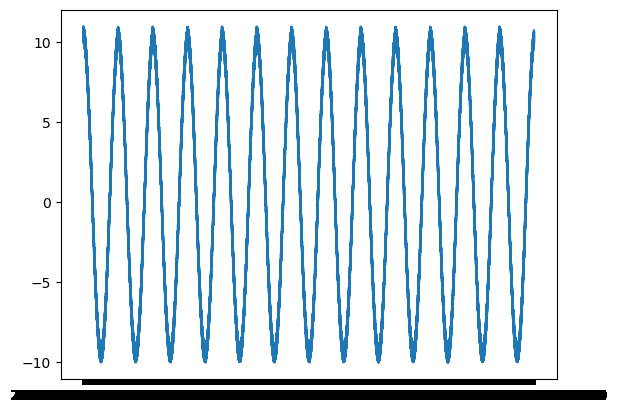

In [27]:
plt.plot(allDataDf['datetime'],allDataDf['timeSeries'])
